In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import matplotlib.pyplot as plt
import time
data = pd.read_csv(r'D:\Thạc sỹ\Optimization\Project\optimization-project\Data\data.csv',sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
df = data.copy()

In [13]:
df['Target_num'] = LabelEncoder().fit_transform(df['Target'])

In [14]:
df.shape

(4424, 38)

In [15]:
df.groupby('Target_num')['Target'].size()

Target_num
0    1421
1     794
2    2209
Name: Target, dtype: int64

In [23]:
X = df.drop(columns=['Target', 'Target_num'])
y = df['Target_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200,multi_class= 'multinomial') # Increase max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (e.g., accuracy)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6610169491525424


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
iters = [1, 5, 10, 20, 50, 100, 200, 300]
times = []

for it in iters:
    model = LogisticRegression(
        max_iter=it,
        solver="lbfgs",
        multi_class="multinomial",
        random_state=42
    )
    start = time.time()
    model.fit(X_train_scaled, y_train)
    end = time.time()
    times.append(end - start)
# Vẽ biểu đồ
plt.plot(iters, times, marker="o")
plt.xlabel("Số iteration (max_iter)")
plt.ylabel("Thời gian huấn luyện (giây)")
plt.title("Training time vs Iterations")
plt.grid(True)
plt.show()

In [28]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

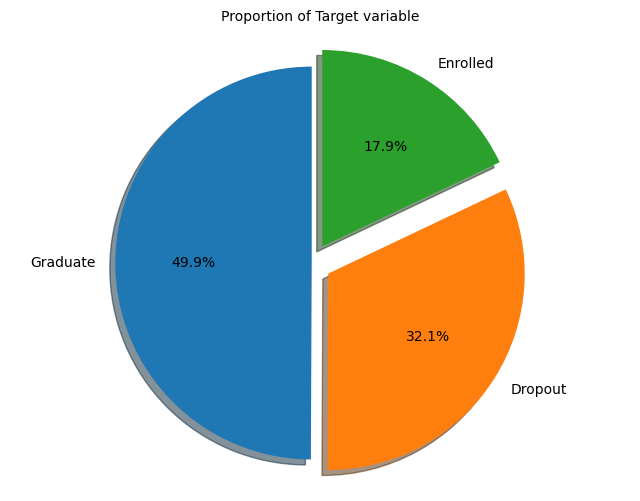

In [5]:

# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [data.Target[data['Target']=='Graduate'].count(), data.Target[data['Target']=='Dropout'].count(), data.Target[data['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

In [7]:
data_num = data.select_dtypes(include=['float64'])
data_num

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


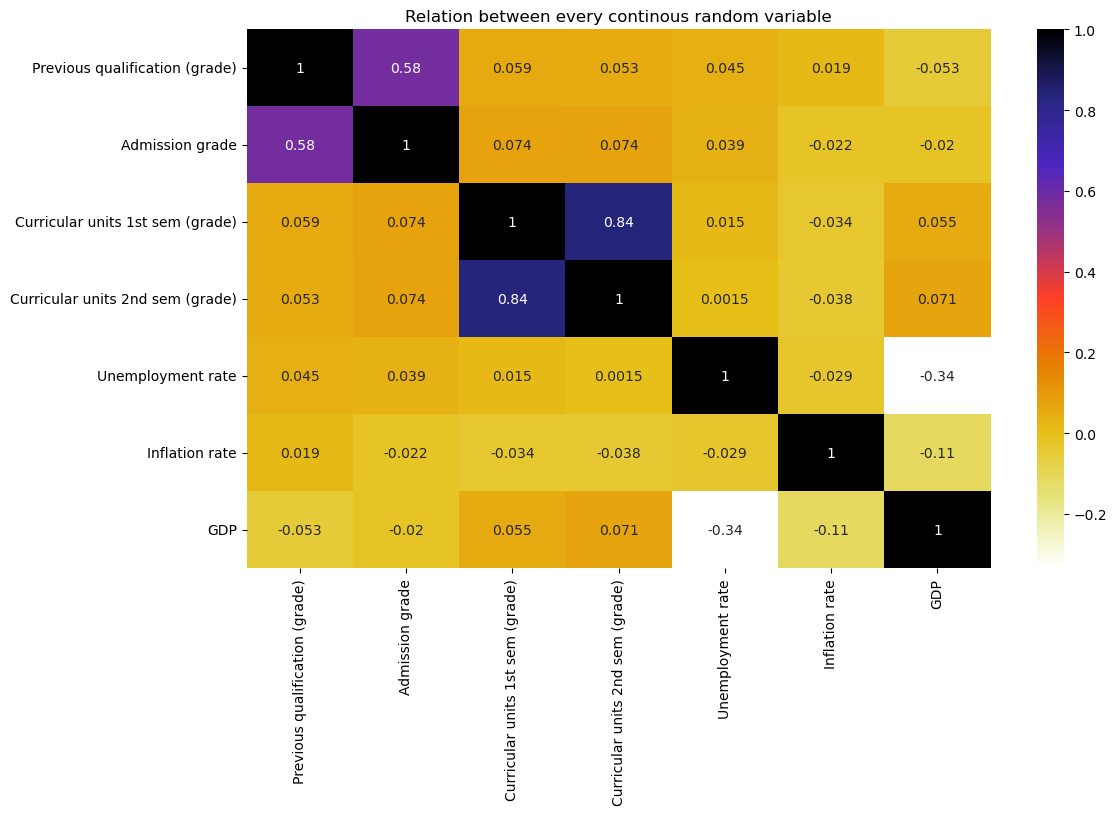

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation between every continous random variable')
plt.show()


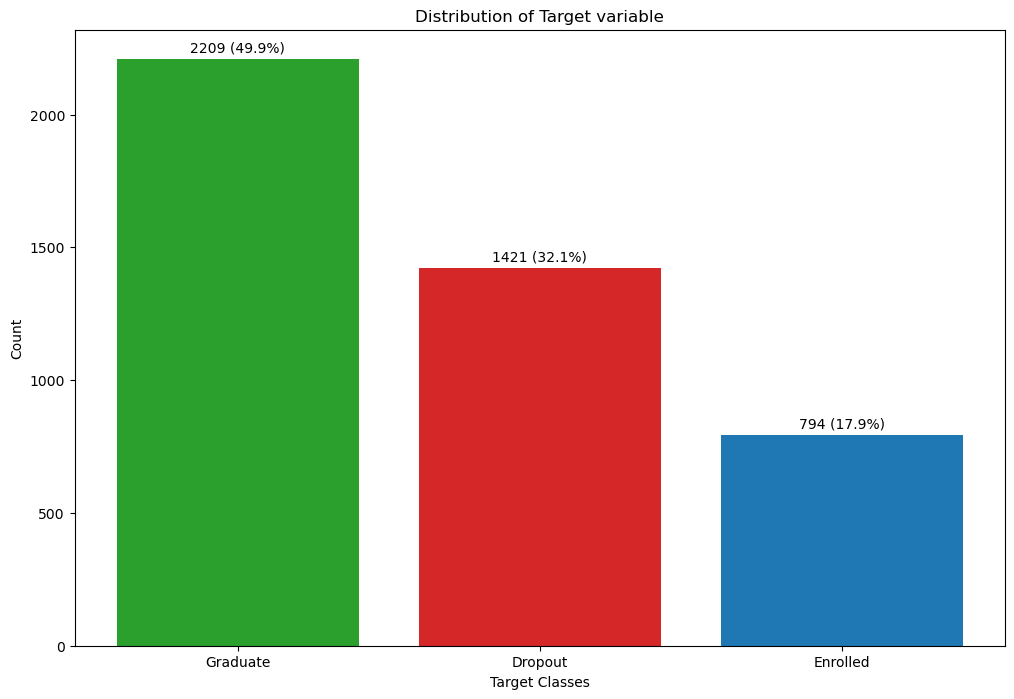

In [14]:
import matplotlib.pyplot as plt

labels = ['Graduate', 'Dropout', 'Enrolled']
sizes = [
    data.Target[data['Target']=='Graduate'].count(),
    data.Target[data['Target']=='Dropout'].count(),
    data.Target[data['Target']=='Enrolled'].count()
]

total = sum(sizes)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, sizes, color=['#2ca02c', '#d62728', '#1f77b4'])

# thêm nhãn số và %
for bar, size in zip(bars, sizes):
    height = bar.get_height()
    percent = size / total * 100
    ax.annotate(f'{size} ({percent:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title("Distribution of Target variable", size=12)
plt.ylabel("Count")
plt.xlabel("Target Classes")

# lưu ảnh (png, dpi = độ phân giải)
plt.savefig(r"D:\Thạc sỹ\Optimization\Project\optimization-project\target_distribution.png", dpi=300, bbox_inches='tight')

plt.show()
